In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid", palette="muted", font_scale=1.1)

df = pd.read_csv("low alloy steels.csv") #dataset


print(df.shape)   # rows, columns
print(df.head())
print(df.info())

(915, 20)
  Alloy code     C    Si    Mn      P      S     Ni    Cr    Mo    Cu    V  \
0        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
1        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
2        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
3        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
4        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   

      Al       N  Ceq  Nb + Ta   Temperature (°C)   0.2% Proof Stress (MPa)  \
0  0.003  0.0066  0.0      0.0                 27                       342   
1  0.003  0.0066  0.0      0.0                100                       338   
2  0.003  0.0066  0.0      0.0                200                       337   
3  0.003  0.0066  0.0      0.0                300                       346   
4  0.003  0.0066  0.0      0.0                400                       316   

    Tensile Strength (MPa)   Elongation (%)   

In [31]:
print(df.describe())

print(df.isnull().sum())

                C          Si          Mn           P           S          Ni  \
count  915.000000  915.000000  915.000000  915.000000  915.000000  915.000000   
mean     0.174929    0.310918    0.812962    0.014543    0.010602    0.143016   
std      0.059674    0.086871    0.342775    0.005244    0.004024    0.172746   
min      0.090000    0.180000    0.420000    0.006000    0.003000    0.000000   
25%      0.130000    0.240000    0.500000    0.010000    0.008000    0.023000   
50%      0.160000    0.300000    0.680000    0.014000    0.010000    0.050000   
75%      0.200000    0.370000    1.210000    0.018000    0.012000    0.210000   
max      0.340000    0.520000    1.480000    0.030000    0.022000    0.600000   

               Cr          Mo          Cu           V          Al           N  \
count  915.000000  915.000000  915.000000  915.000000  915.000000  915.000000   
mean     0.427861    0.442870    0.079148    0.060190    0.012435    0.007652   
std      0.457568    0.3943

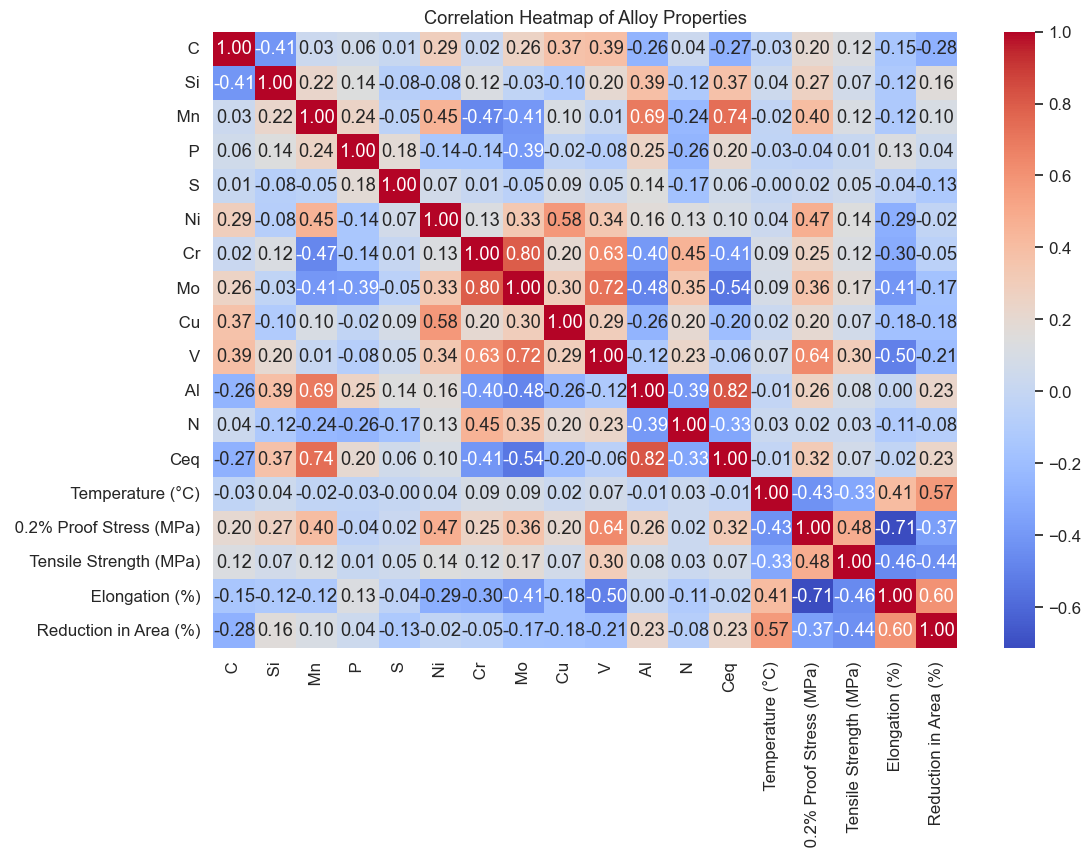

In [33]:
df_numeric = df.drop(columns=["Alloy code","Nb + Ta"])
plt.figure(figsize=(12,8)) 
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f") 
plt.title("Correlation Heatmap of Alloy Properties") 
plt.savefig("results/heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

In [35]:
df.columns = df.columns.str.strip()       # remove leading/trailing spaces
df.columns = df.columns.str.replace('\n','')  # remove newlines

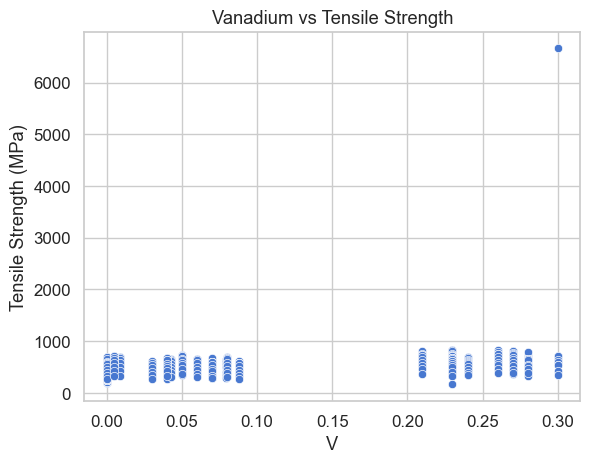

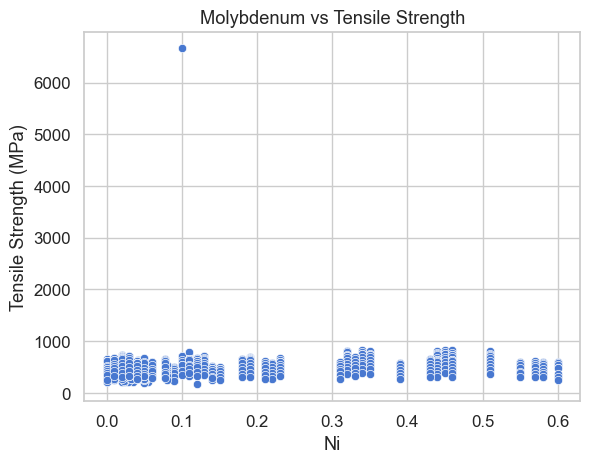

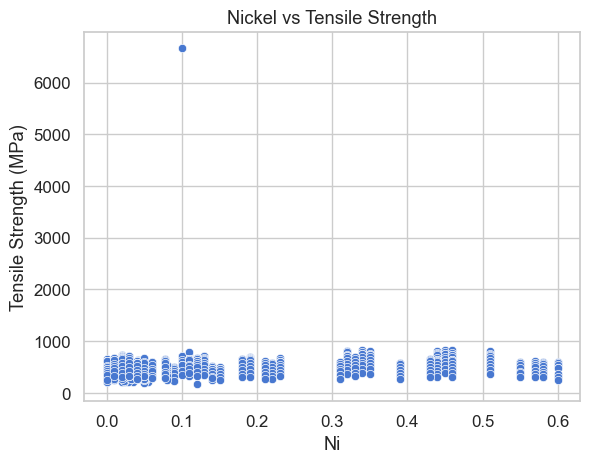

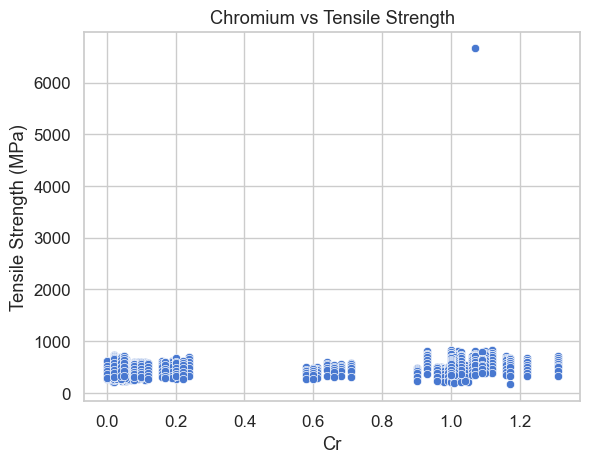

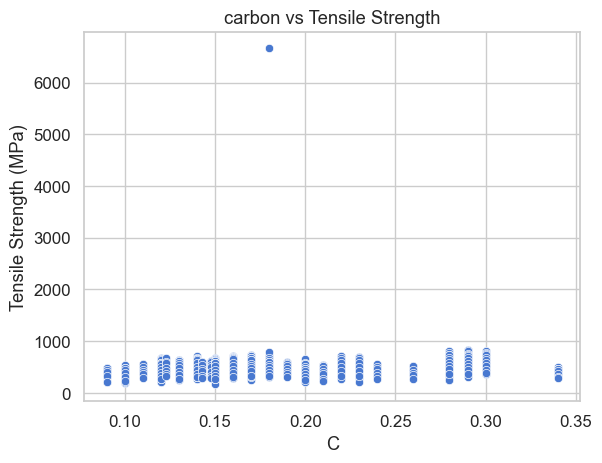

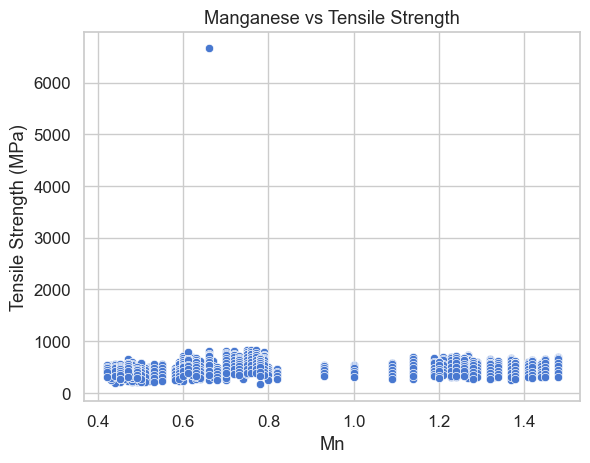

In [37]:
# Vanadium vs Tensile Strength
sns.scatterplot(x="V", y="Tensile Strength (MPa)", data=df)
plt.title("Vanadium vs Tensile Strength")
plt.show()

# Molybdenum vs Tensile Strength
sns.scatterplot(x="Ni", y="Tensile Strength (MPa)", data=df)
plt.title("Molybdenum vs Tensile Strength")
plt.show()

# Nickel vs Tensile Strength
sns.scatterplot(x="Ni", y="Tensile Strength (MPa)", data=df)
plt.title("Nickel vs Tensile Strength")
plt.show()

# chromium vs Tensile Strength
sns.scatterplot(x="Cr", y="Tensile Strength (MPa)", data=df)
plt.title("Chromium vs Tensile Strength")
plt.show()

# Carbon vs Tensile Strength
sns.scatterplot(x="C", y="Tensile Strength (MPa)", data=df)
plt.title("carbon vs Tensile Strength")
plt.show()

# Manganese vs Tensile Strength
sns.scatterplot(x="Mn", y="Tensile Strength (MPa)", data=df)
plt.title("Manganese vs Tensile Strength")
plt.show()

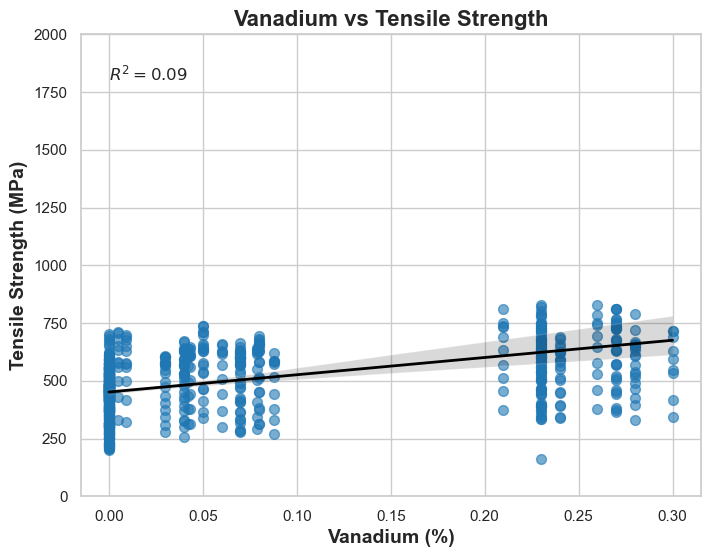

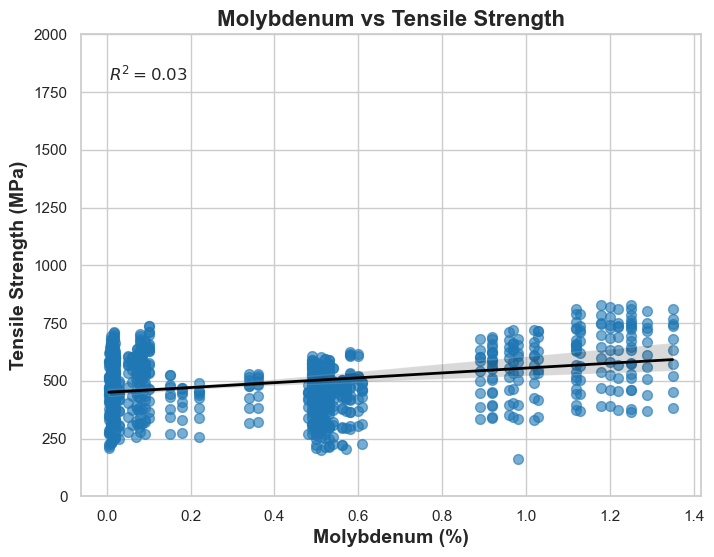

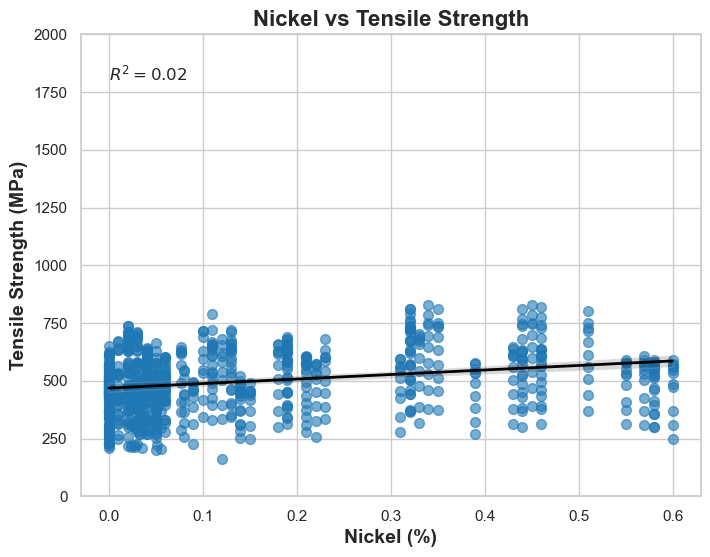

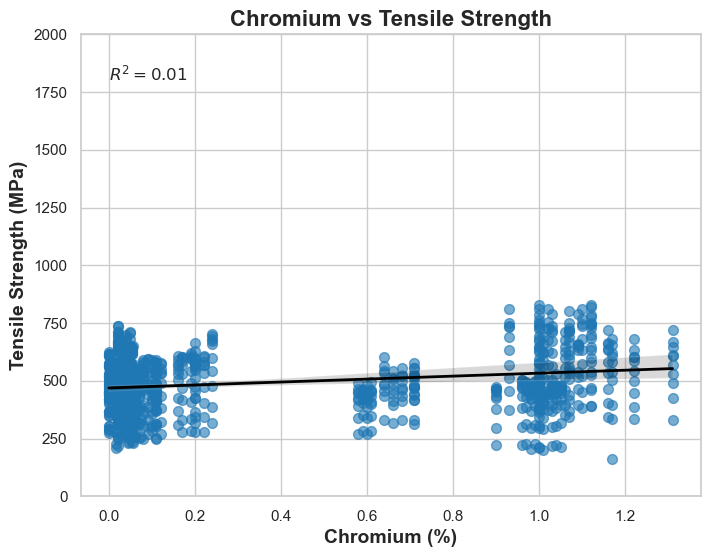

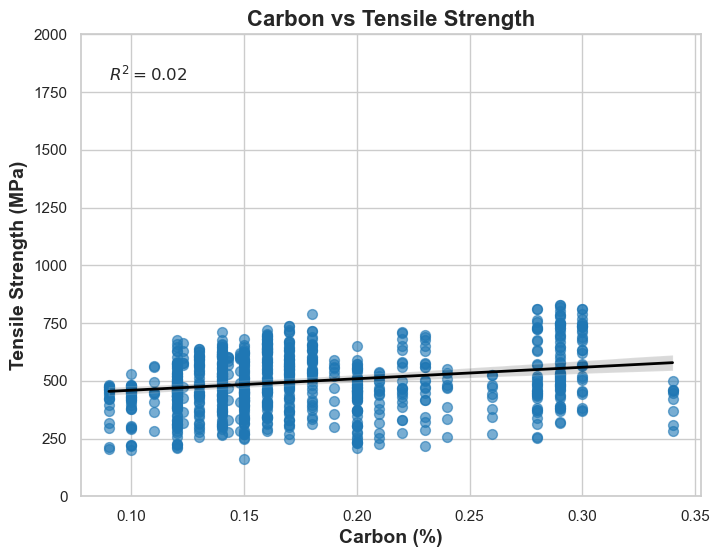

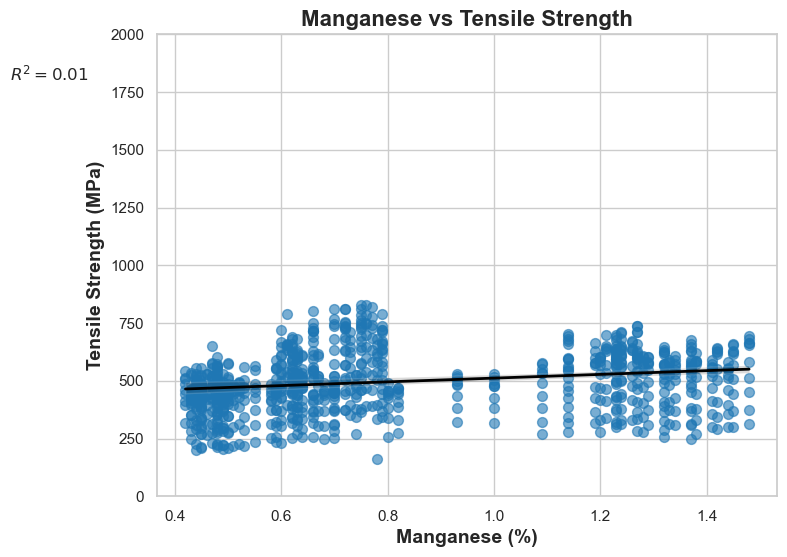

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

sns.set_theme(style="whitegrid")

# --- Vanadium ---
X = df[["V"]]
y = df["Tensile Strength (MPa)"]
model = LinearRegression().fit(X, y)
r2 = model.score(X, y)

plt.figure(figsize=(8,6))
sns.regplot(x="V", y="Tensile Strength (MPa)", data=df,
            scatter_kws={'s':50, 'alpha':0.6, 'color':'#1f77b4'},
            line_kws={'color':'black', 'linewidth':2})
plt.title("Vanadium vs Tensile Strength", fontsize=16, weight='bold')
plt.xlabel("Vanadium (%)", fontsize=14, weight='bold')
plt.ylabel("Tensile Strength (MPa)", fontsize=14, weight='bold')
plt.ylim(0, 2000)
plt.text(df["V"].min(), 1800, f"$R^2 = {r2:.2f}$", fontsize=12, weight='bold')
plt.savefig("results/Vanadium_vs_TensileStrength_LinkedIn.png", dpi=300, bbox_inches="tight")
plt.show()


# --- Molybdenum ---
X = df[["Mo"]]
y = df["Tensile Strength (MPa)"]
model = LinearRegression().fit(X, y)
r2 = model.score(X, y)

plt.figure(figsize=(8,6))
sns.regplot(x="Mo", y="Tensile Strength (MPa)", data=df,
            scatter_kws={'s':50, 'alpha':0.6, 'color':'#1f77b4'},
            line_kws={'color':'black', 'linewidth':2})
plt.title("Molybdenum vs Tensile Strength", fontsize=16, weight='bold')
plt.xlabel("Molybdenum (%)", fontsize=14, weight='bold')
plt.ylabel("Tensile Strength (MPa)", fontsize=14, weight='bold')
plt.ylim(0, 2000)
plt.text(df["Mo"].min(), 1800, f"$R^2 = {r2:.2f}$", fontsize=12, weight='bold')
plt.savefig("results/Molybdenum_vs_TensileStrength_LinkedIn.png", dpi=300, bbox_inches="tight")
plt.show()


# --- Nickel ---
X = df[["Ni"]]
y = df["Tensile Strength (MPa)"]
model = LinearRegression().fit(X, y)
r2 = model.score(X, y)

plt.figure(figsize=(8,6))
sns.regplot(x="Ni", y="Tensile Strength (MPa)", data=df,
            scatter_kws={'s':50, 'alpha':0.6, 'color':'#1f77b4'},
            line_kws={'color':'black', 'linewidth':2})
plt.title("Nickel vs Tensile Strength", fontsize=16, weight='bold')
plt.xlabel("Nickel (%)", fontsize=14, weight='bold')
plt.ylabel("Tensile Strength (MPa)", fontsize=14, weight='bold')
plt.ylim(0, 2000)
plt.text(df["Ni"].min(), 1800, f"$R^2 = {r2:.2f}$", fontsize=12, weight='bold')
plt.savefig("results/Nickel_vs_TensileStrength_LinkedIn.png", dpi=300, bbox_inches="tight")
plt.show()


# --- Chromium ---
X = df[["Cr"]]
y = df["Tensile Strength (MPa)"]
model = LinearRegression().fit(X, y)
r2 = model.score(X, y)

plt.figure(figsize=(8,6))
sns.regplot(x="Cr", y="Tensile Strength (MPa)", data=df,
            scatter_kws={'s':50, 'alpha':0.6, 'color':'#1f77b4'},
            line_kws={'color':'black', 'linewidth':2})
plt.title("Chromium vs Tensile Strength", fontsize=16, weight='bold')
plt.xlabel("Chromium (%)", fontsize=14, weight='bold')
plt.ylabel("Tensile Strength (MPa)", fontsize=14, weight='bold')
plt.ylim(0, 2000)
plt.text(df["Cr"].min(), 1800, f"$R^2 = {r2:.2f}$", fontsize=12, weight='bold')
plt.savefig("results/Chromium_vs_TensileStrength_LinkedIn.png", dpi=300, bbox_inches="tight")
plt.show()


# --- Carbon ---
X = df[["C"]]
y = df["Tensile Strength (MPa)"]
model = LinearRegression().fit(X, y)
r2 = model.score(X, y)

plt.figure(figsize=(8,6))
sns.regplot(x="C", y="Tensile Strength (MPa)", data=df,
            scatter_kws={'s':50, 'alpha':0.6, 'color':'#1f77b4'},
            line_kws={'color':'black', 'linewidth':2})
plt.title("Carbon vs Tensile Strength", fontsize=16, weight='bold')
plt.xlabel("Carbon (%)", fontsize=14, weight='bold')
plt.ylabel("Tensile Strength (MPa)", fontsize=14, weight='bold')
plt.ylim(0, 2000)
plt.text(df["C"].min(), 1800, f"$R^2 = {r2:.2f}$", fontsize=12, weight='bold')
plt.savefig("results/Carbon_vs_TensileStrength_LinkedIn.png", dpi=300, bbox_inches="tight")
plt.show()

# --- Manganese ---
X = df[["Mn"]]
y = df["Tensile Strength (MPa)"]
model = LinearRegression().fit(X, y)
r2 = model.score(X, y)

plt.figure(figsize=(8,6))
sns.regplot(x="Mn", y="Tensile Strength (MPa)", data=df,
            scatter_kws={'s':50, 'alpha':0.6, 'color':'#1f77b4'},
            line_kws={'color':'black', 'linewidth':2})
plt.title("Manganese vs Tensile Strength", fontsize=16, weight='bold')
plt.xlabel("Manganese (%)", fontsize=14, weight='bold')
plt.ylabel("Tensile Strength (MPa)", fontsize=14, weight='bold')
plt.ylim(0, 2000)
plt.text(df["C"].min(), 1800, f"$R^2 = {r2:.2f}$", fontsize=12, weight='bold')
plt.savefig("results/Manganese_vs_TensileStrength_LinkedIn.png", dpi=300, bbox_inches="tight")
plt.show()